<a href="https://colab.research.google.com/github/JahongirFozilovich/Data-Science-practice/blob/main/Bank_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/h4PPC71.png)
#**18-modul. Amaliyot. Customer Churn**
# 18.6. Modul boʻyicha yakuniy amaliy vazifa

**Bu vazifa orqali data sayns jarayoni:**

✔️ maʼlumot tayyorlash;

  ✔️ model qurish;

  ✔️ baholash;

  ✔️ natijalarni tahlil qilish
  kabi koʻnikmalarga ega boʻlasiz.

#**Vazifa: bank mijozlarining noroziligini bashorat qilish**

**Vazifa tavsifi**

Sizga bank mijozlari haqida maʼlumotlar toʻplami berilgan. Maqsad – qaysi mijozlar bank xizmatlaridan voz kechishini (churn) oldindan bashorat qilish. Bank bu orqali oʻz mijozlarini ushlab qolish strategiyalarini yaxshilashi mumkin.

**Maʼlumotlar toʻplami**

Kaggle platformasidagi Churn Modelling maʼlumotlar toʻplamidan foydalanamiz. Ushbu toʻplamda 10 000 ta mijozning quyidagi maʼlumotlari mavjud:

- mijoz identifikatori (RowNumber, CustomerId, Surname);
- geografik joylashuvi (Geography);
- jinsi (Gender);
- yoshi (Age);
- kredit balli (CreditScore);
- yillik daromadi (EstimatedSalary);
- bankda qancha vaqtdan beri mijoz ekani (Tenure);
- qancha mahsulotdan foydalanishi (NumOfProducts);
- faoliyati (HasCrCard, IsActiveMember);
- balans (Balance);
- prognoz qilish holati, churn (Exited) – maqsadli oʻzgaruvchi.

**Topshiriqlar**

1. **Maʼlumotlarni tahlil qilish va tozalash:**
   - Maʼlumotlardagi boʻsh qiymatlar va anomaliyalarni aniqlang hamda tozalang.
   - Kategorik oʻzgaruvchilarni raqamli koʻrinishga oʻtkazing (masalan, one-hot encoding yordamida).

2. **Maʼlumotlarni boʻlish:**
   - Maʼlumotlarni training va test toʻplamlariga ajrating (masalan, 80% training, 20% test).

3. **Model qurish:**
   - Quyidagi algoritmlar yordamida modellarni yarating:
     - Logistic Regression
     - Support Vector Machine (SVM)
     - Decision Tree
     - Random Forest
     - XGBoost

4. **Modellarni baholash:**
   - Har bir model uchun quyidagi koʻrsatkichlarni hisoblang:
     - Aniqlik (Accuracy)
     - Toʻgʻrilik (Precision)
     - Recall
     - F1-score

5. **Natijalarni tahlil qilish:**
   - Olingan natijalarni solishtiring va qaysi model eng yaxshi ishlashini aniqlang.
   - Eng yaxshi model asosida bankka mijozlarni ushlab qolish boʻyicha tavsiyalar bering.
---

###*** ESLATMA**. *Ushbu amaliy vazifada siz oʻtmagan mavzulardan ham savollar va vazifalar boʻlishi mumkin! Bu savollarni mustaqil oʻrganishingiz kerak boʻladi. Bunday vazifalar mustaqil izlanish koʻnikmangizni oshirish uchun tayyorlandi!*

In [47]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [4]:
url = "https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Churn_Modelling.xls"
df = pd.read_csv(url, index_col='RowNumber')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [15]:
exited = df.Exited.value_counts()/len(df.Exited)*100

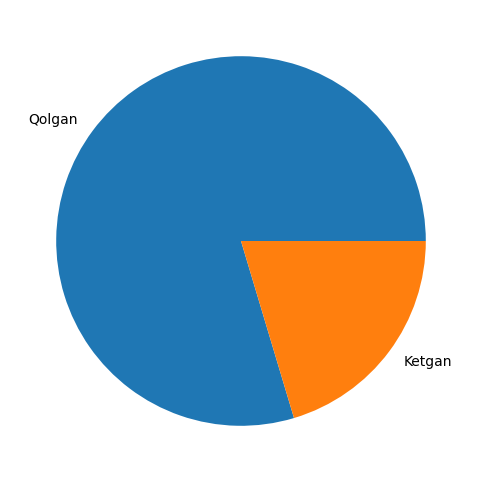

In [16]:
plt.figure(figsize=(10, 6))
plt.pie(exited, labels=['Qolgan', 'Ketgan'])
plt.show()

In [17]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


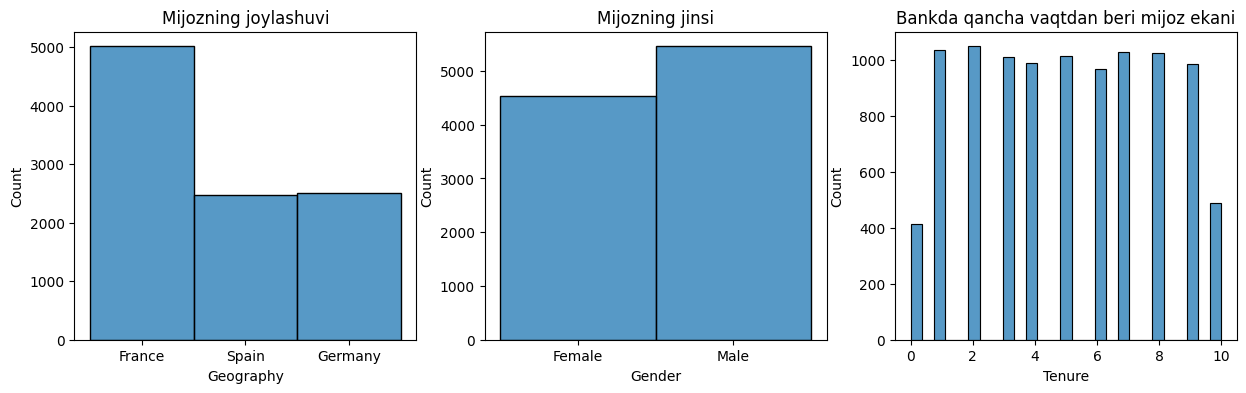

In [32]:
fig, axes = plt.subplots(1,3, figsize=(15,4))

# Tenure
sns.histplot(x="Geography", data=df, ax=axes[0])
axes[0].set_title("Mijozning joylashuvi")

#OrderCount
sns.histplot(x="Gender", data=df, ax=axes[1])
axes[1].set_title("Mijozning jinsi")

# Cashback
sns.histplot(x="Tenure", data=df, ax=axes[2])
axes[2].set_title("Bankda qancha vaqtdan beri mijoz ekani")

plt.show()

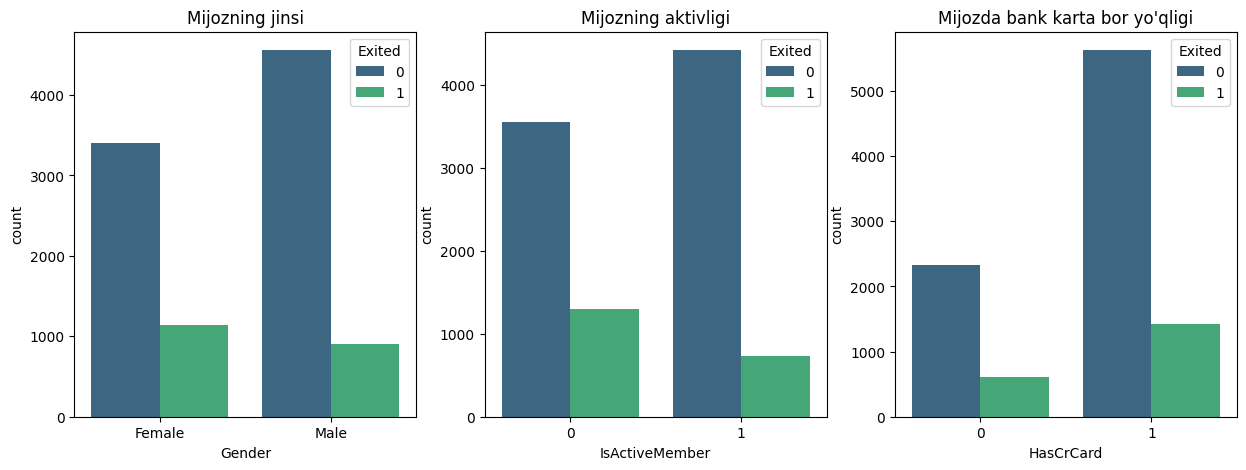

In [31]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='Gender', hue='Exited', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Mijozning jinsi")

sns.countplot(x='IsActiveMember', hue='Exited', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Mijozning aktivligi")

sns.countplot(x='HasCrCard', hue='Exited', palette='viridis', data=df, ax=axes[2])
axes[2].set_title("Mijozda bank karta bor yo'qligi")

plt.show()

In [33]:
df.corrwith(df['Exited'], numeric_only=True).abs().sort_values(ascending=False)

,0
Exited,1.000000
Age,0.285323
IsActiveMember,0.156128
Balance,0.118533
NumOfProducts,0.047820
CreditScore,0.027094
Tenure,0.014001
EstimatedSalary,0.012097
HasCrCard,0.007138
CustomerId,0.006248


In [41]:
df.drop('Surname', axis=1, inplace=True)
encoded = pd.get_dummies(df)
encoded.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,,,
1,15634602,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
4,15701354,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [49]:
X = encoded.drop('Exited', axis=1)
y = encoded.Exited.copy()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [53]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [54]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#**ML**
#Logistic Regression

In [55]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [61]:
lr_predicted = lr_model.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1604
           1       0.63      0.24      0.34       396

    accuracy                           0.82      2000
   macro avg       0.73      0.60      0.62      2000
weighted avg       0.80      0.82      0.79      2000

Model aniqligi: 0.821


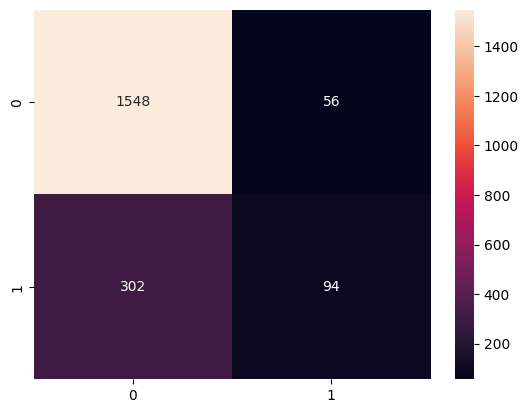

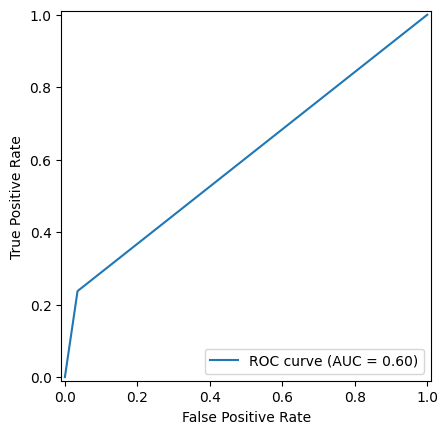

In [62]:
print(metrics.classification_report(y_test, lr_predicted))
print("Model aniqligi:", metrics.accuracy_score(y_test,lr_predicted))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, lr_predicted)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#**Support Vector Machine**

In [63]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

SVC()

In [64]:
svm_predicted = svm_model.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1604
           1       0.82      0.40      0.54       396

    accuracy                           0.86      2000
   macro avg       0.85      0.69      0.73      2000
weighted avg       0.86      0.86      0.85      2000

Model aniqligi: 0.865


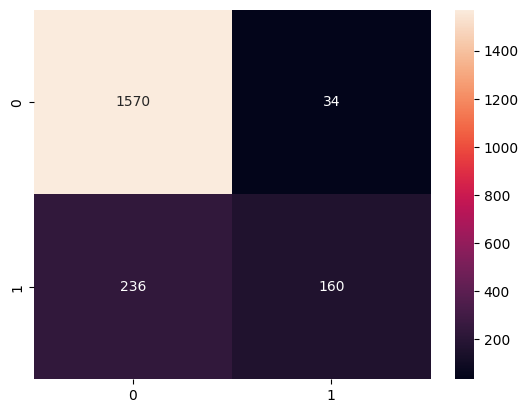

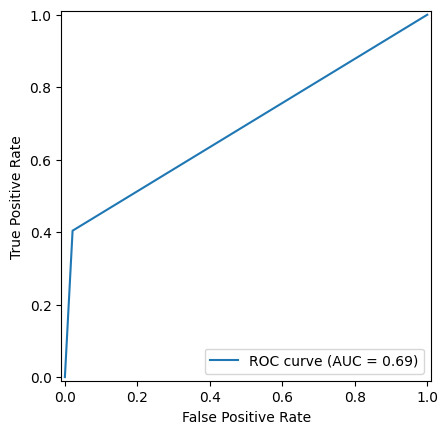

In [65]:
print(metrics.classification_report(y_test, svm_predicted))
print("Model aniqligi:", metrics.accuracy_score(y_test,svm_predicted))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, svm_predicted)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#**Decision Tree**

In [66]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [67]:
dt_predicted = dt_model.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1604
           1       0.45      0.51      0.48       396

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.78      2000

Model aniqligi: 0.78


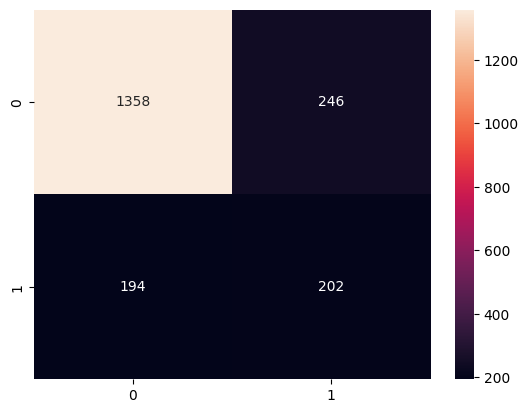

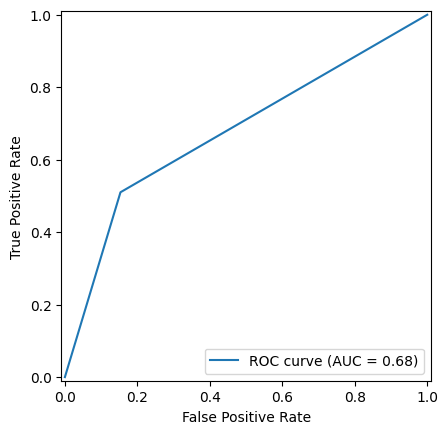

In [68]:
print(metrics.classification_report(y_test, dt_predicted))
print("Model aniqligi:", metrics.accuracy_score(y_test,dt_predicted))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, dt_predicted)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, dt_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#**Random Forest**

In [69]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [70]:
rf_predicted = rf_model.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1604
           1       0.78      0.48      0.60       396

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Model aniqligi: 0.871


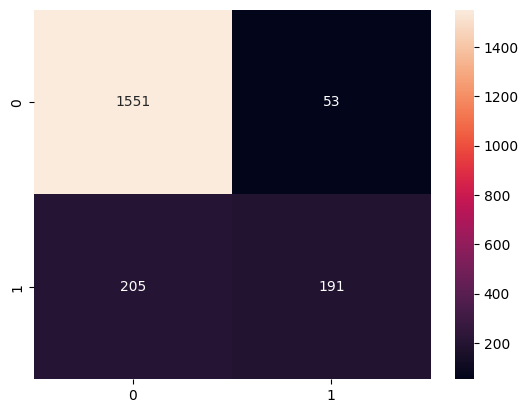

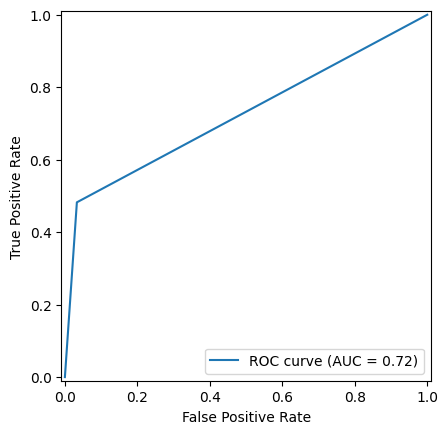

In [71]:
print(metrics.classification_report(y_test, rf_predicted))
print("Model aniqligi:", metrics.accuracy_score(y_test,rf_predicted))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, rf_predicted)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#**XGBoost**

In [72]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [73]:
xbg_predicted = xgb_model.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1604
           1       0.71      0.52      0.60       396

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

Model aniqligi: 0.862


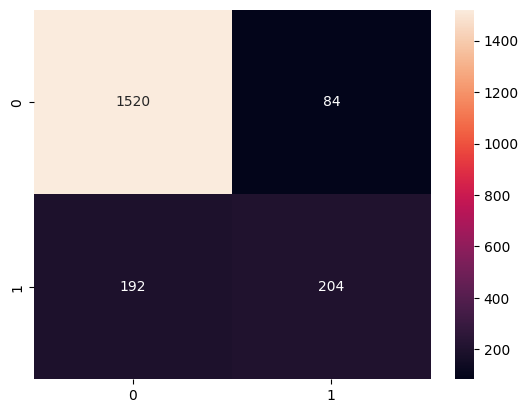

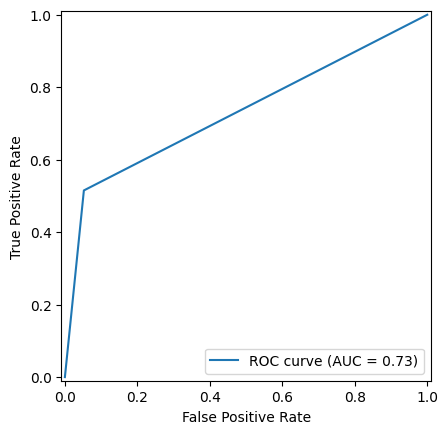

In [74]:
print(metrics.classification_report(y_test, xbg_predicted))
print("Model aniqligi:", metrics.accuracy_score(y_test,xbg_predicted))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, xbg_predicted)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, xbg_predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#**XGBOOST is more accurate for our model and if i had a choice i would choose it for sure!**

In [83]:
encodedlr = encoded.drop('Exited', axis=1)
y = encoded.Exited.copy()

In [84]:
encoded_lr = scaler.transform(encodedlr)

In [90]:
xgbe_predicted = xgb_model.predict(encoded_lr)

In [95]:
data = pd.DataFrame({'XGBoost': xgbe_predicted, 'Real':y})
data.sample(10)

,XGBoost,Real
RowNumber,,
2785,0,0
8953,1,1
8689,1,1
5744,0,0
7519,0,0
283,1,1
5844,0,0
6078,0,0
6400,0,1
